In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\ego_2\Documents\Ebac\Clases\Python\Python_avanzado')

#se usa la funcion read_csv para leer el archivo csv
df=pd.read_csv('supermarket_sales.csv')

In [2]:
#muestreo de 5 lineas
print(df.sample(5))

      Invoice ID Branch       City Customer type  Gender         Product line  \
192  286-43-6208      C  Naypyitaw        Normal  Female   Food and beverages   
476  485-30-8700      A     Yangon        Normal  Female    Sports and travel   
100  163-56-7055      C  Naypyitaw        Member    Male  Fashion accessories   
270  783-09-1637      B   Mandalay        Normal  Female    Sports and travel   
274  477-24-6490      B   Mandalay        Normal  Female    Health and beauty   

     Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
192       87.80         9  39.5100  829.7100  3/16/2019  19:08         Cash   
476       33.26         5   8.3150  174.6150  3/18/2019  16:10  Credit card   
100       48.71         1   2.4355   51.1455  3/26/2019  19:20         Cash   
270       67.43         5  16.8575  354.0075   3/6/2019  18:13      Ewallet   
274       99.71         6  29.9130  628.1730  2/26/2019  16:52      Ewallet   

       cogs  gross margin percentage  

In [3]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
361,605-72-4132,C,Naypyitaw,Normal,Female,Food and beverages,94.47,8,37.788,793.548,2/27/2019,15:12,Cash,755.76,4.761905,37.788,9.1
300,446-47-6729,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.982,209.622,1/2/2019,18:09,Credit card,199.64,4.761905,9.982,6.7
668,408-66-6712,C,Naypyitaw,Member,Female,Health and beauty,47.71,6,14.313,300.573,2/16/2019,14:19,Ewallet,286.26,4.761905,14.313,4.4
962,593-08-5916,A,Yangon,Normal,Female,Fashion accessories,15.50,1,0.775,16.275,3/19/2019,15:23,Credit card,15.50,4.761905,0.775,7.4
419,745-71-3520,A,Yangon,Member,Female,Electronic accessories,25.22,7,8.827,185.367,2/4/2019,10:23,Cash,176.54,4.761905,8.827,8.2


In [4]:
#transfoma las columnas unit_price y quantity en array de numpy
unit_price = df['Unit price'].to_numpy()
quantity = df['Quantity'].to_numpy()


In [6]:
type(unit_price)

numpy.ndarray

In [7]:
#Generar estadística descriptiva básica en las columnas unit_price y quantity: Cálculo de la media, mediana, moda
mean_unit_price = np.mean(unit_price)
mean_quantity = np.mean(quantity)
median_unit_price = np.median(unit_price)
median_quantity = np.median(quantity)
mode_unit_price = pd.Series(unit_price).mode()[0]
mode_quantity = pd.Series(quantity).mode()[0]



In [9]:
#imprimimos los resultados redondeado a 2 decimales
print(f"Media Unit Price: {mean_unit_price:.2f}")
print(f"Media Quantity: {mean_quantity:.2f}")
print(f"Mediana Unit Price: {median_unit_price:.2f}")
print(f"Mediana Quantity: {median_quantity:.2f}")
print(f"Moda Unit Price: {mode_unit_price:.2f}")
print(f"Moda Quantity: {mode_quantity:.2f}")



Media Unit Price: 55.67
Media Quantity: 5.51
Mediana Unit Price: 55.23
Mediana Quantity: 5.00
Moda Unit Price: 83.77
Moda Quantity: 10.00


In [10]:
#ticket promedio por ciudad 
avg_ticket_per_city = df.groupby('City')['Total'].mean().reset_index()
print(avg_ticket_per_city)

        City       Total
0   Mandalay  319.872506
1  Naypyitaw  337.099715
2     Yangon  312.354031


In [13]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [18]:
#ticket promedio por ciudad y product line
avg_ticket_per_city_product_line = df.groupby(['City', 'Product line'])['Total'].mean().reset_index()
print(avg_ticket_per_city_product_line)
#ticket promedio por ciudad y product line en formato pivot
#avg_ticket_pivot = df.pivot_table(index='City', columns='Product line', values='Total', aggfunc='mean').reset_index()
#print(avg_ticket_pivot)


         City            Product line       Total
0    Mandalay  Electronic accessories  310.026245
1    Mandalay     Fashion accessories  264.730911
2    Mandalay      Food and beverages  304.297770
3    Mandalay       Health and beauty  376.993585
4    Mandalay      Home and lifestyle  350.983290
5    Mandalay       Sports and travel  322.390306
6   Naypyitaw  Electronic accessories  344.890445
7   Naypyitaw     Fashion accessories  331.693385
8   Naypyitaw      Food and beverages  360.103864
9   Naypyitaw       Health and beauty  319.525500
10  Naypyitaw      Home and lifestyle  308.790067
11  Naypyitaw       Sports and travel  350.265067
12     Yangon  Electronic accessories  305.285225
13     Yangon     Fashion accessories  320.245265
14     Yangon      Food and beverages  295.915526
15     Yangon       Health and beauty  268.037298
16     Yangon      Home and lifestyle  344.879931
17     Yangon       Sports and travel  328.350839


In [16]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [19]:
#ticket promedio por ciudad y genero
avg_ticket_per_gender=df.groupby(['City','Gender'])['Total'].mean().reset_index()
print(avg_ticket_per_gender)

        City  Gender       Total
0   Mandalay  Female  326.717870
1   Mandalay    Male  313.349276
2  Naypyitaw  Female  346.547545
3  Naypyitaw    Male  325.888290
4     Yangon  Female  330.864391
5     Yangon    Male  295.705047


In [20]:
#ticket promedio por genero y product line
avg_ticket_gender_product=df.groupby(['Gender','Product line'])['Total'].mean().reset_index()
print(avg_ticket_gender_product)


    Gender            Product line       Total
0   Female  Electronic accessories  322.643125
1   Female     Fashion accessories  317.056250
2   Female      Food and beverages  368.565750
3   Female       Health and beauty  290.015414
4   Female      Home and lifestyle  380.213639
5   Female       Sports and travel  324.712739
6     Male  Electronic accessories  316.691965
7     Male     Fashion accessories  291.079207
8     Male      Food and beverages  273.499125
9     Male       Health and beauty  348.099460
10    Male      Home and lifestyle  294.136241
11    Male       Sports and travel  340.360327


In [21]:
#ventas por ciudad
ventas_ciudad = df.groupby('City')['Total'].sum().reset_index()
ventas_ciudad['Rank'] = ventas_ciudad['Total'].rank(ascending=False, method='dense')
ventas_ciudad['Porcentaje_aporte'] = (ventas_ciudad['Total'] / df['Total'].sum()) * 100
top_5_ciudades = ventas_ciudad.sort_values('Total', ascending=False).head(5)
top_5_ciudades


,City,Total,Rank,Porcentaje_aporte
1,Naypyitaw,110568.7065,1.0,34.235322
2,Yangon,106200.3705,2.0,32.882757
0,Mandalay,106197.6720,3.0,32.881921


In [23]:
#2. Ventas por Tipo de Cliente (Member / Normal)
ventas_tipo_cliente = df.groupby('Customer type')['Total'].sum().reset_index()
ventas_tipo_cliente['Rank'] = ventas_tipo_cliente['Total'].rank(ascending=False, method='dense')
ventas_tipo_cliente['Porcentaje_aporte'] = (ventas_tipo_cliente['Total'] / df['Total'].sum()) * 100
ventas_tipo_cliente = ventas_tipo_cliente.sort_values('Total', ascending=False)
ventas_tipo_cliente['Porcentaje_aporte'] = ventas_tipo_cliente['Porcentaje_aporte'].round(2)
ventas_tipo_cliente['Total'] = ventas_tipo_cliente['Total'].round(2)
ventas_tipo_cliente['Rank'] = ventas_tipo_cliente['Rank'].astype(int)
ventas_tipo_cliente


,Customer type,Total,Rank,Porcentaje_aporte
0,Member,164223.44,1,50.85
1,Normal,158743.30,2,49.15


In [24]:
ventas_pago = df.groupby('Payment')['Total'].sum().reset_index()
ventas_pago['Rank'] = ventas_pago['Total'].rank(ascending=False, method='dense')
ventas_pago['Porcentaje_aporte'] = (ventas_pago['Total'] / df['Total'].sum()) * 100
top_5_pago = ventas_pago.sort_values('Total', ascending=False).head(5)
top_5_pago
#ventas por forma de pago


,Payment,Total,Rank,Porcentaje_aporte
0,Cash,112206.570,1.0,34.742453
2,Ewallet,109993.107,2.0,34.057099
1,Credit card,100767.072,3.0,31.200448


In [31]:
#Cálculo de una matriz de correlación entre la hora (sin minutos) y el total, y otra que correlacione el unit_price con el rating de la transacción, para validar si los productos más caros son los que dejan más margen
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
#matriz de correlacion entre hora y total
correlation_hour_total = df[['Hour', 'Total']].corr()
correlation_hour_total

C:\Users\ego_2\AppData\Local\Temp\ipykernel_26364\2527636964.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,Hour,Total
Hour,1.00000,-0.00277
Total,-0.00277,1.00000


In [28]:
correlacion_hora_total_spearman = df[['Hour', 'Total']].corr(method='spearman')
correlacion_hora_total_spearman


,Hour,Total
Hour,1.000000,0.006832
Total,0.006832,1.000000


In [29]:
#Correlación entre unit price y rating
#Esto ayuda a ver si productos más caros tienen mejor calificación por los clientes.
correlacion_precio_rating = df[['Unit price', 'Rating']].corr()
correlacion_precio_rating


,Unit price,Rating
Unit price,1.000000,-0.008778
Rating,-0.008778,1.000000


In [30]:
correlacion_precio_margen = df[['Unit price', 'gross income']].corr()
correlacion_precio_margen
#Correlación entre unit price y gross income

,Unit price,gross income
Unit price,1.000000,0.633962
gross income,0.633962,1.000000


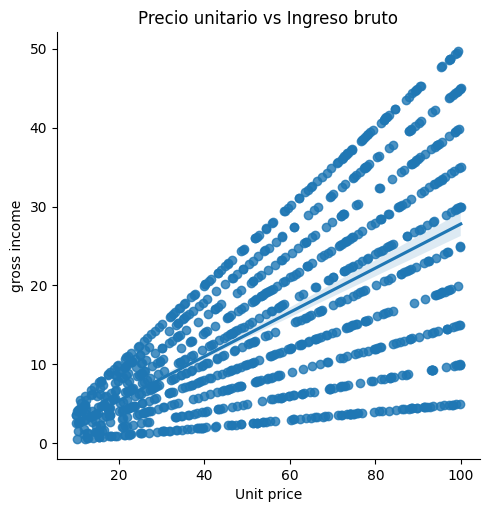

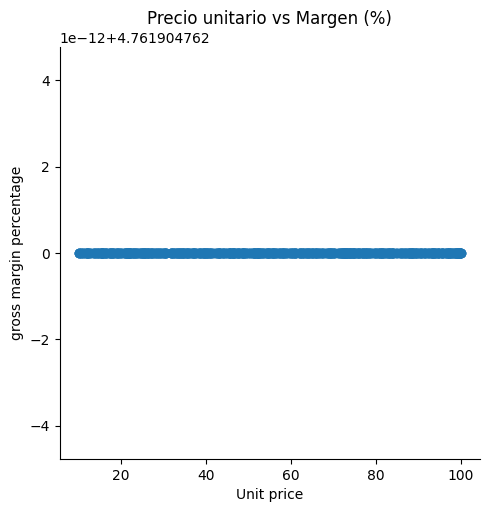

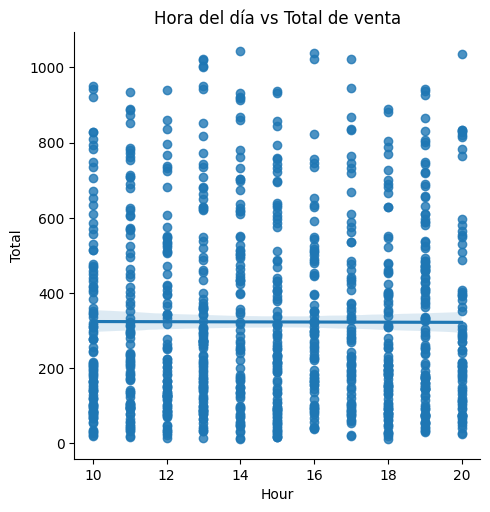

In [33]:
# 1. Precio vs Ingreso bruto
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=df, x='Unit price', y='gross income')
plt.title('Precio unitario vs Ingreso bruto')
plt.show()

# 2. Precio vs Margen
sns.lmplot(data=df, x='Unit price', y='gross margin percentage')
plt.title('Precio unitario vs Margen (%)')
plt.show()

# 3. Hora vs Total
sns.lmplot(data=df, x='Hour', y='Total')
plt.title('Hora del día vs Total de venta')
plt.show()


Estadísticas generales
Métrica	Unit Price	Quantity
Media	55.67	5.51
Mediana	55.23	5.00
Moda	83.77	10.00
🔍 Conclusión:

El precio promedio está alrededor de 55, con una moda alta (83.77), lo que indica que algunos productos caros se repiten mucho.

La cantidad más vendida por ticket suele ser 5 unidades, pero el valor que más se repite es 10 unidades.

📍 Ventas por ciudad
Ciudad	Total ventas	% Aporte
Naypyitaw	110,568.71	34.2% (mayor aporte)
Yangon	106,200.37	32.88%
Mandalay	106,197.67	32.88%
🔍 Conclusión:

Las ventas están muy balanceadas entre las 3 ciudades, con Naypyitaw ligeramente a la cabeza.

No hay una concentración excesiva en una sola ciudad → buen alcance de mercado.

🧍‍♂️🧍‍♀️ Ventas por tipo de cliente
Tipo cliente	Total ventas	% Aporte
Member	164,223.44	50.85%
Normal	158,743.30	49.15%
🔍 Conclusión:

Hay una ligera preferencia o fidelidad por parte de los miembros.

Conviene reforzar programas de fidelización.

💳 Ventas por método de pago
Método de pago	Total	% Aporte
Cash	112,206.57	34.74%
Ewallet	109,993.11	34.06%
Credit card	100,767.07	31.20%
🔍 Conclusión:

Los pagos están muy bien distribuidos, con cash como el método más usado.

Importante seguir aceptando variedad de métodos.

📈 Correlaciones clave
Variables comparadas	Correlación	Conclusión
Unit price vs gross income	0.63	Moderada y positiva: productos más caros generan más ganancias.
Unit price vs Rating	-0.0088	Nula: el precio no afecta la calificación.
Hour vs Total	-0.0027	Nula: la hora del día no afecta el monto de ventas.
🎯 Ventas por género y ciudad
Las mujeres gastan más en Naypyitaw y Yangon.

En Mandalay los hombres compran ligeramente menos.

🛍️ Género + Product Line
Mujeres compran más en:

Home and lifestyle

Food and beverages

Hombres compran más en:

Health and beauty

Sports and travel

🧠 Conclusión general
El comportamiento de ventas está muy equilibrado entre ciudades y tipos de clientes.

Los productos más caros generan más ingresos, aunque no son necesariamente mejor calificados.

Los horarios de compra no afectan significativamente el total vendido.

Se detectan preferencias por género según la categoría, lo que abre oportunidad de segmentar promociones.

